# Data Preprocessing



## 1. Looking at the Data

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the cleaned datasets
data_train =  pd.read_csv("C:/Users/zohar/OneDrive - University College London/2 - CEGE0004 Machine Learning for Data Science/Cleaned_data/data_train.csv")
data_test = pd.read_csv("C:/Users/zohar/OneDrive - University College London/2 - CEGE0004 Machine Learning for Data Science/Cleaned_data/data_test.csv")

#print(data_train.head())
#print(data_test.head())


   age         workclass  fnlwgt  education  educational_num  \
0   39         State-gov   77516  Bachelors               13   
1   50  Self-emp-not-inc   83311  Bachelors               13   
2   38           Private  215646    HS-grad                9   
3   53           Private  234721       11th                7   
4   28           Private  338409  Bachelors               13   

       marital-status         occupation   relationship   race  gender  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  income  
0          2174             0              40  United-States       0  
1             0             

In this cleaned datasets train and test, the income attribute were transformed 0 to be <=50 is 0 and 1 to be >50

In [78]:
dfx = pd.DataFrame(data_train, columns = ['age', 'workclass', 'fnlwgt', 'education', 'educational_num', 'marital-status', 'occupation', 'relationship','race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'], )
dfy = pd.DataFrame(data_train, columns = ['income'])

#print (dfx)
#print (dfy)


       income
0           0
1           0
2           0
3           0
4           0
...       ...
32556       0
32557       1
32558       0
32559       0
32560       1

[32561 rows x 1 columns]


The content of this dataframe

In [80]:
data_train.head()

,age,workclass,fnlwgt,education,educational_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Looking at some stastistics of the dataframe - for the numeric attribute

In [81]:
data_train.shape

(32561, 15)

Looking at the data type of each attribute

In [82]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   educational_num  32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


Looking at the statistics of the dataframe - for the numeric attributes

In [84]:
data_num = data_train.drop(["educational_num","income"], axis=1)
#axis=1: we want to drop columns rather than rows
data_num.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


Looking at some stastitics of the dataframe - for the categorical attribute

In [85]:
data_train.describe(include=["O"])
#the ["O"] is to include the parameter only column with dtype "object"
#i.e., columns that contain string or mixed data types

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,24532,10501,14976,5983,13193,27816,21790,29753


## 2. Data Transformation


In [86]:
from sklearn.preprocessing import LabelEncoder

#load the datasets
data_train =  pd.read_csv("C:/Users/zohar/OneDrive - University College London/2 - CEGE0004 Machine Learning for Data Science/Cleaned_data/data_train.csv")
data_test = pd.read_csv("C:/Users/zohar/OneDrive - University College London/2 - CEGE0004 Machine Learning for Data Science/Cleaned_data/data_test.csv")

# Select the categorical columns to encode
cat_columns = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]

# Encode categorical columns using Label Encoding for data_train
le = LabelEncoder()
for col in cat_columns:
    data_train[col] = le.fit_transform(data_train[col])

# Encode categorical columns using Label Encoding for data_test
le = LabelEncoder()
for col in cat_columns:
    data_test[col] = le.fit_transform(data_test[col])


# Print the first 5 rows of the transformed dataset
#print(data_train.head())
#print(data_test.head())



## 5. Visualysing the Data

Adapted from kaggle: [Simple EDA for Beginner](https://www.kaggle.com/code/alokevil/simple-eda-for-beginners#5.-EDA)

### 5.1 Distribution for numeric attributes

This will include six attribute which are:

1. age
2. fnlwgt
3. education-num
4. hours-per-week
5. capital-gain
6. capital-loss

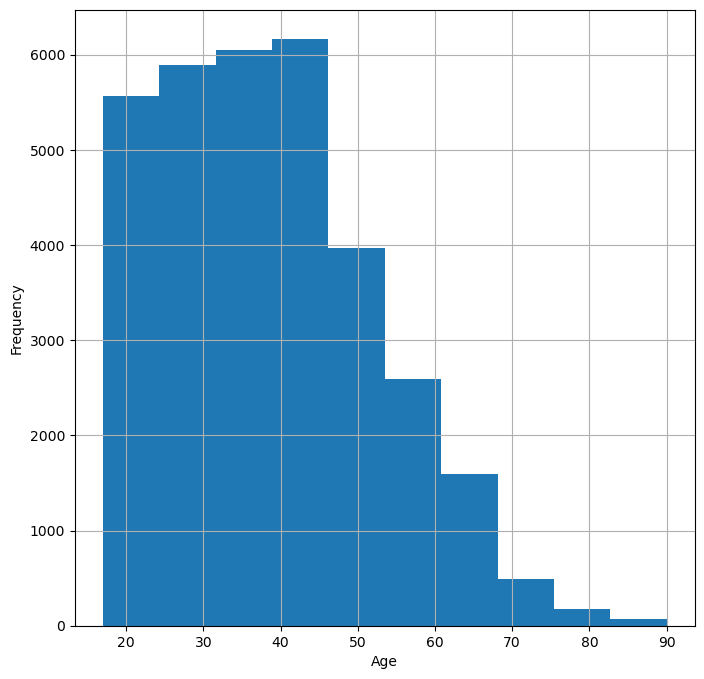

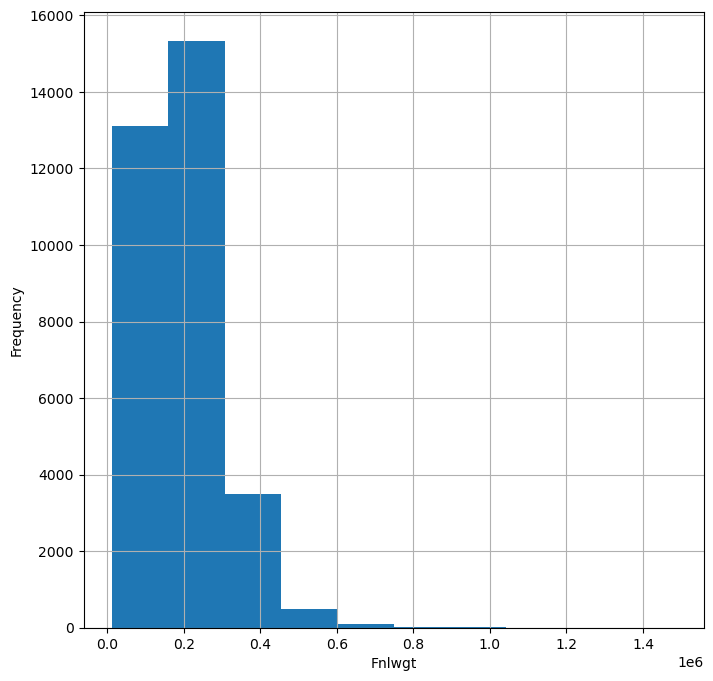

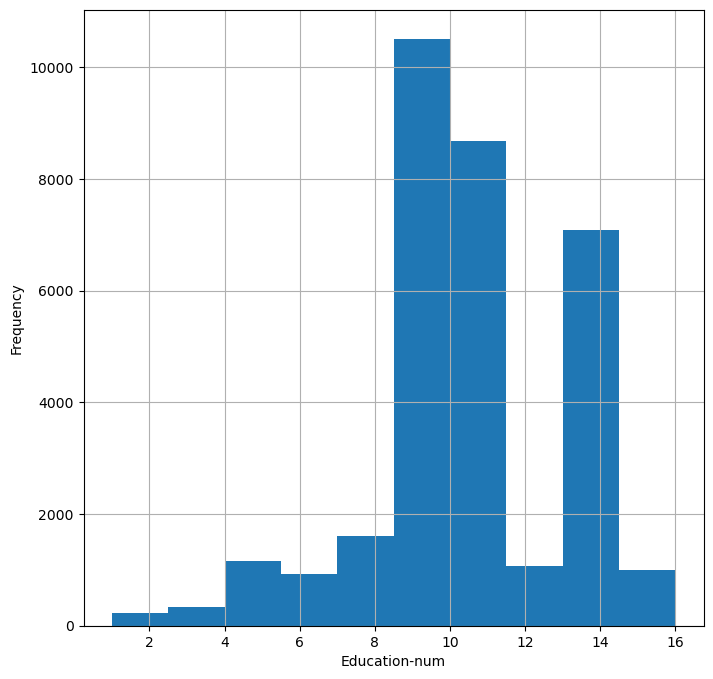

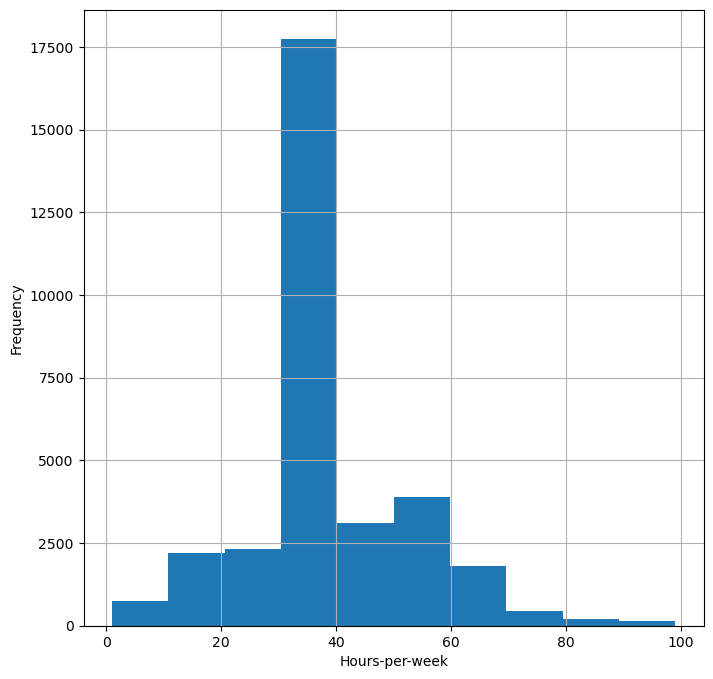

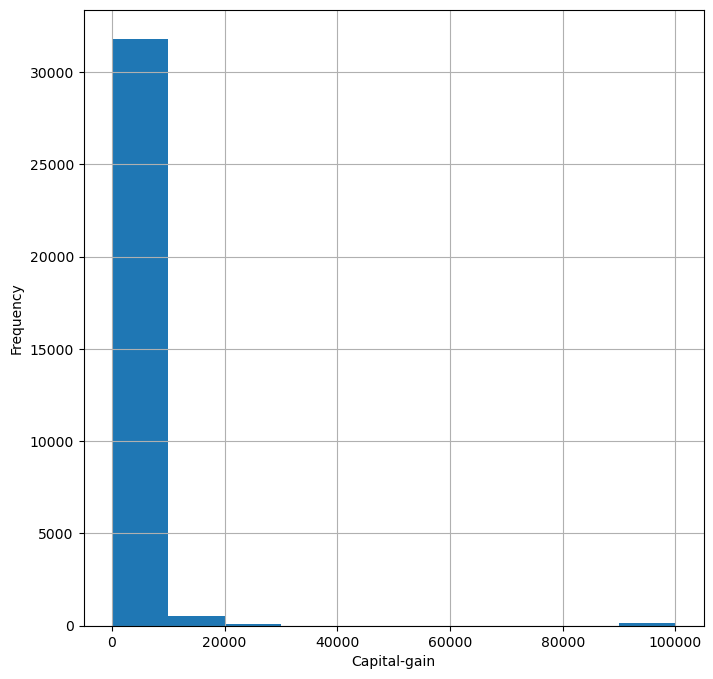

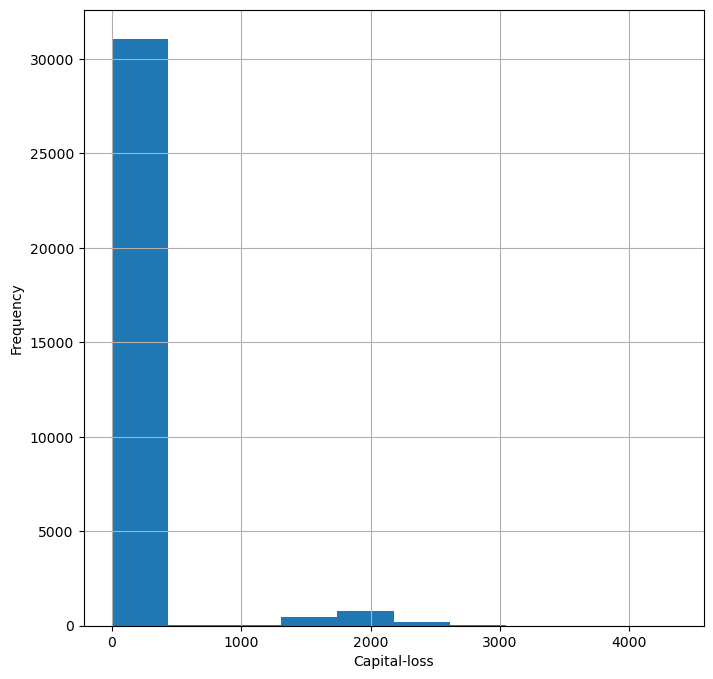

In [24]:
#age
data['age'].hist(figsize=(8,8))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#plt.savefig('age_histogram.jpg') -dont know how to output to the right folder

#fnlwgt
data['fnlwgt'].hist(figsize=(8,8))
plt.xlabel('Fnlwgt')
plt.ylabel('Frequency')
plt.show()

#education-num
data['education-num'].hist(figsize=(8,8))
plt.xlabel('Education-num')
plt.ylabel('Frequency')
plt.show()

#hours-per-week
data['hours-per-week'].hist(figsize=(8,8))
plt.xlabel('Hours-per-week')
plt.ylabel('Frequency')
plt.show()

#capital-gain
data['capital-gain'].hist(figsize=(8,8))
plt.xlabel('Capital-gain')
plt.ylabel('Frequency')
plt.show()

#capital-loss
data['capital-loss'].hist(figsize=(8,8))
plt.xlabel('Capital-loss')
plt.ylabel('Frequency')
plt.show()

### 5.2 Relationship between capiltal-gain and capital-loss

In [13]:

sns.relplot('capital-gain','capital-loss', data=data)
plt.xlabel("capital-gain")
plt.ylabel("capital-loss")
plt.show()

TypeError: relplot() got multiple values for argument 'data'

### 5.3 Distribution for categorical attribute

This include 8 attribute which are:

1. workclass
2. education
3. marital-status
4. occupation
5. relationship
6. race
7. sex
8. native country

education-num too? - (i think educationa and education-num is redundant)


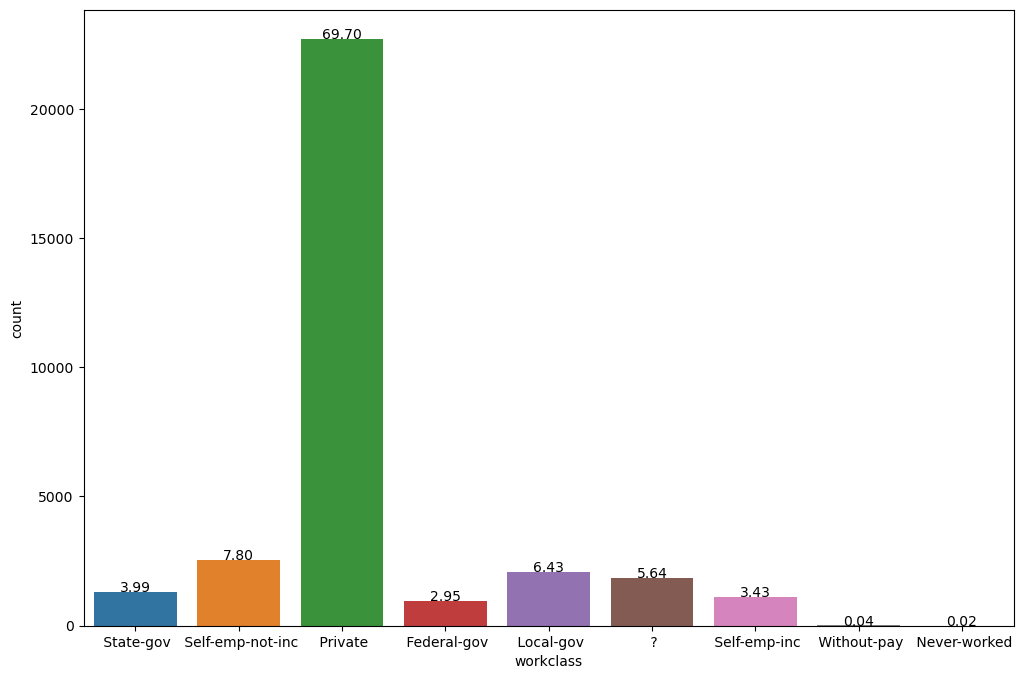

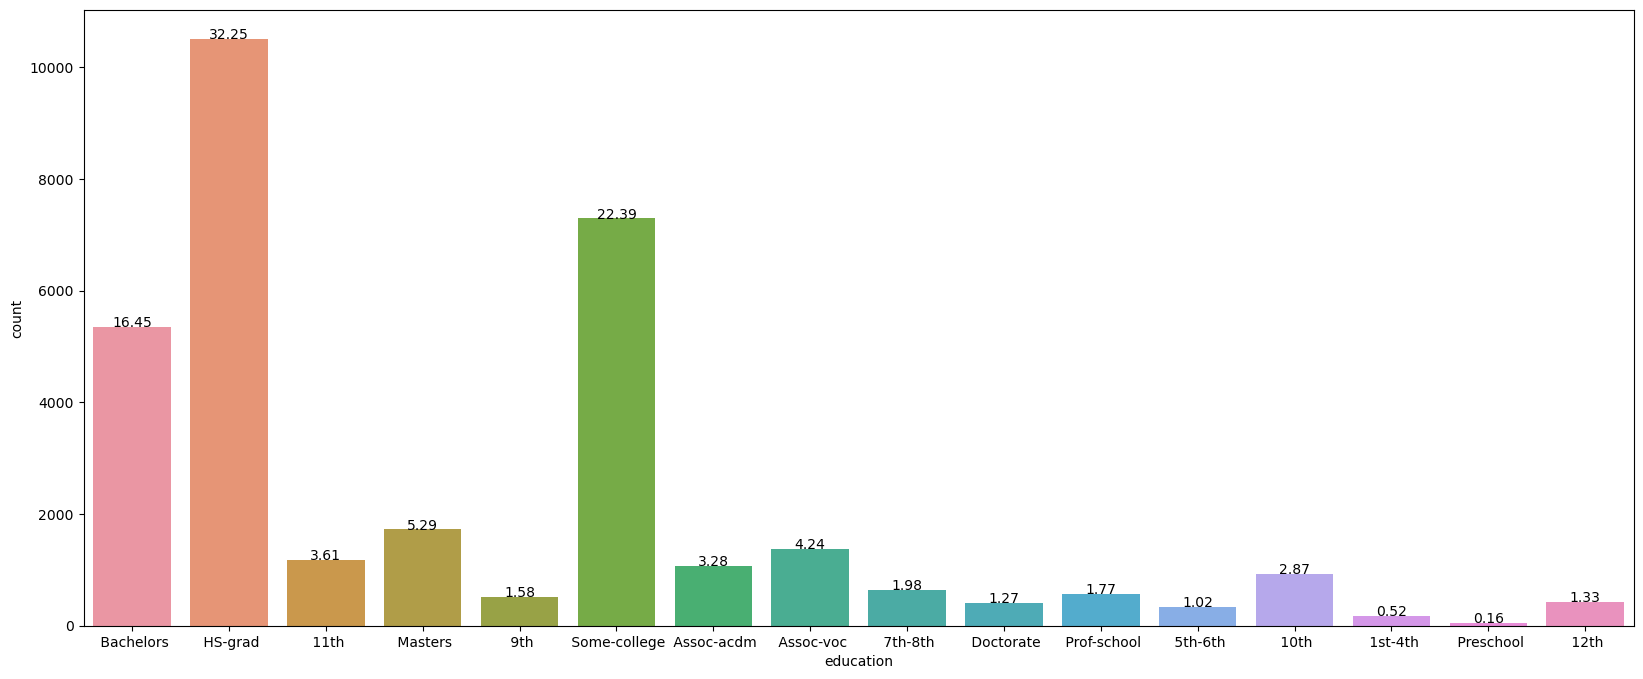

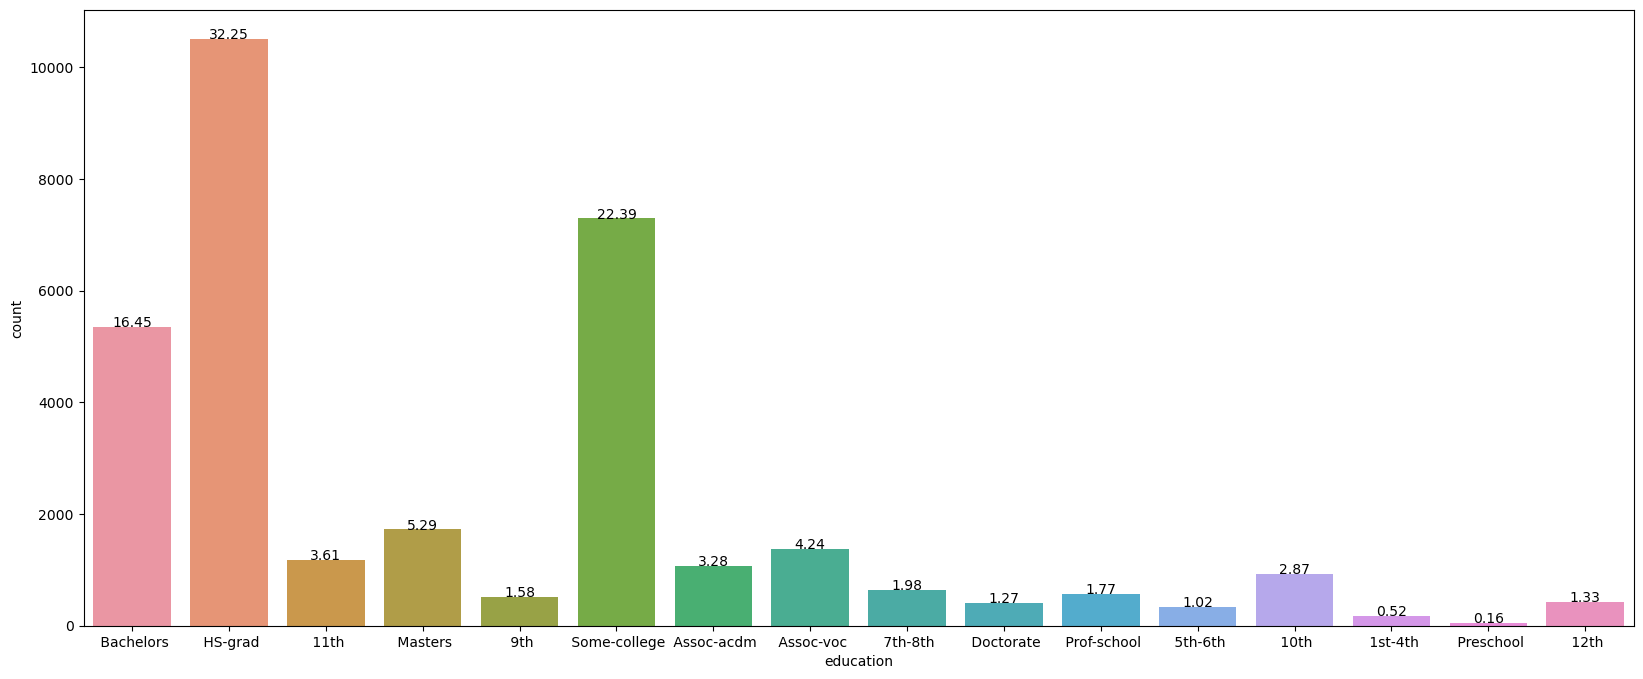

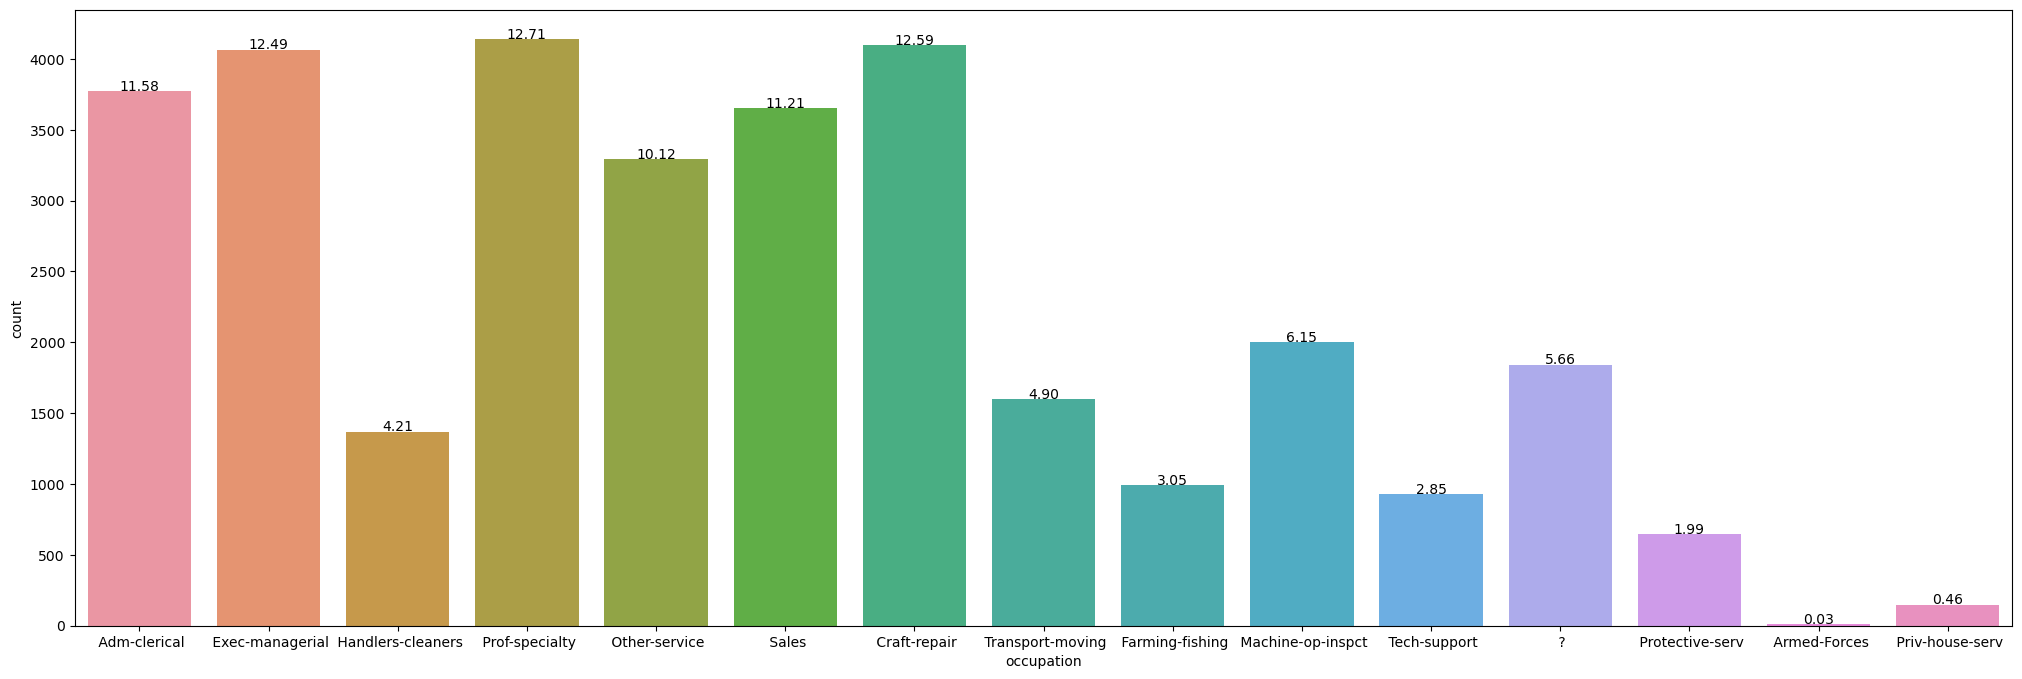

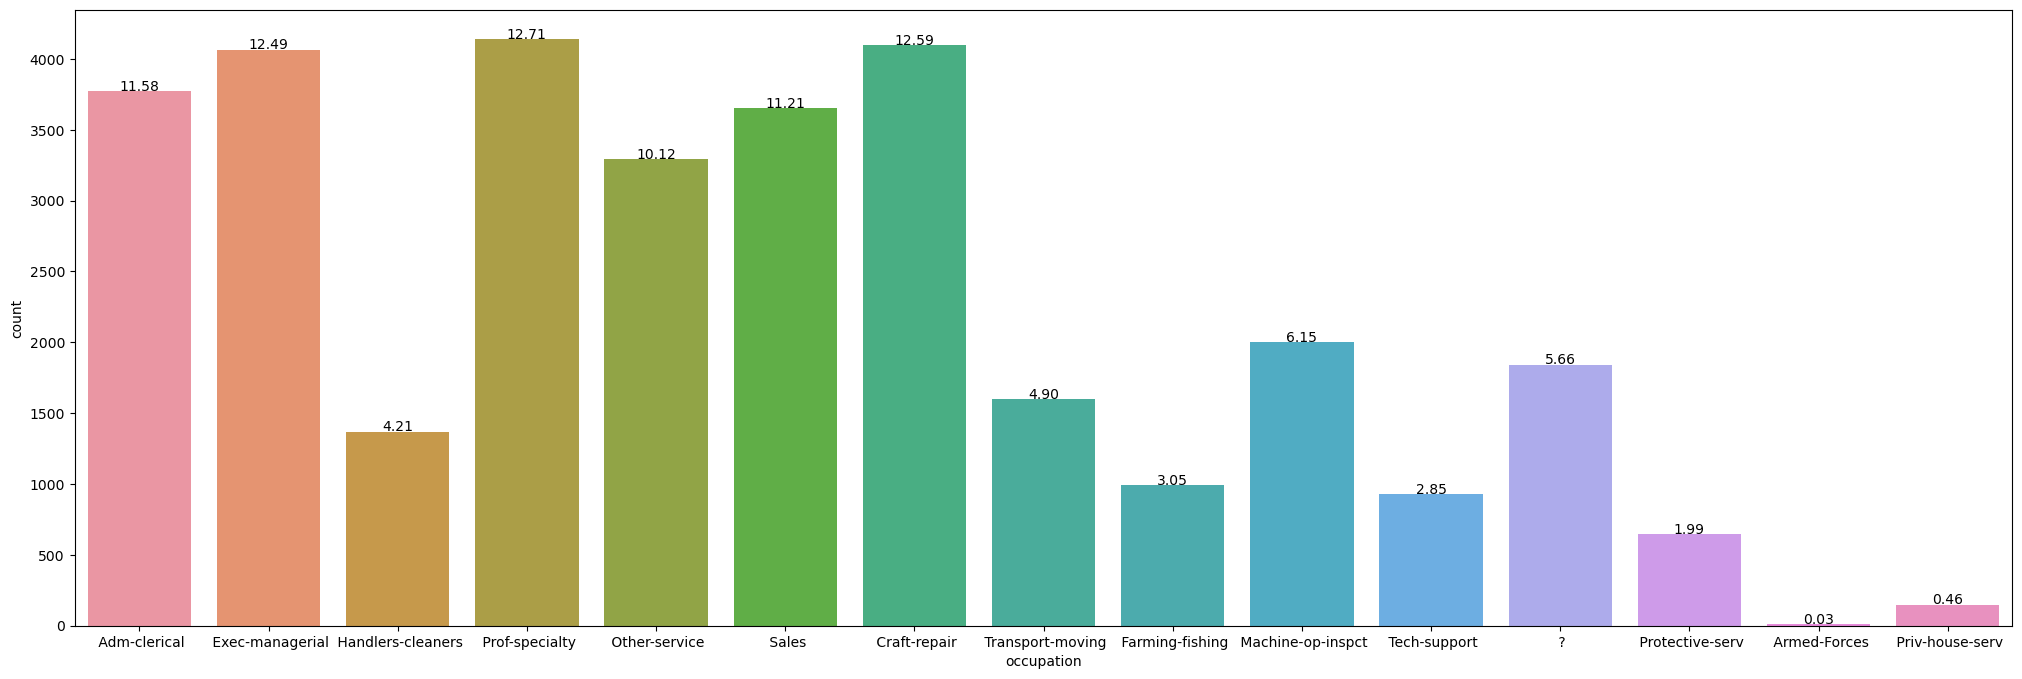

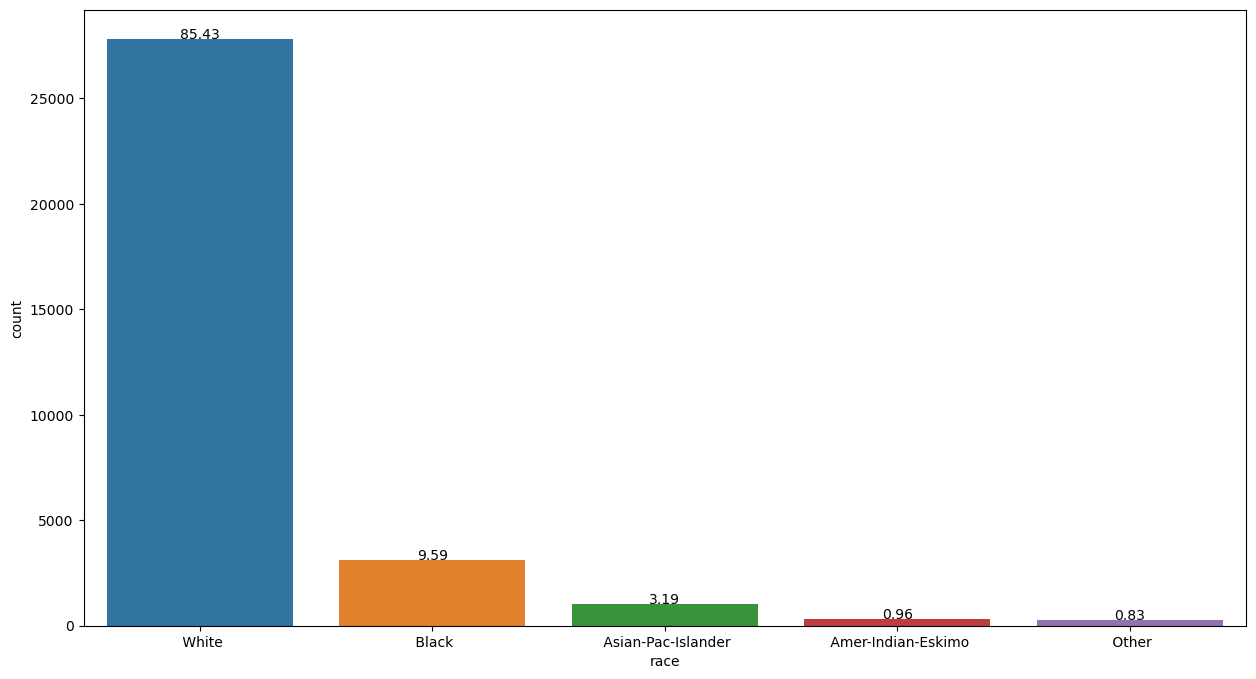

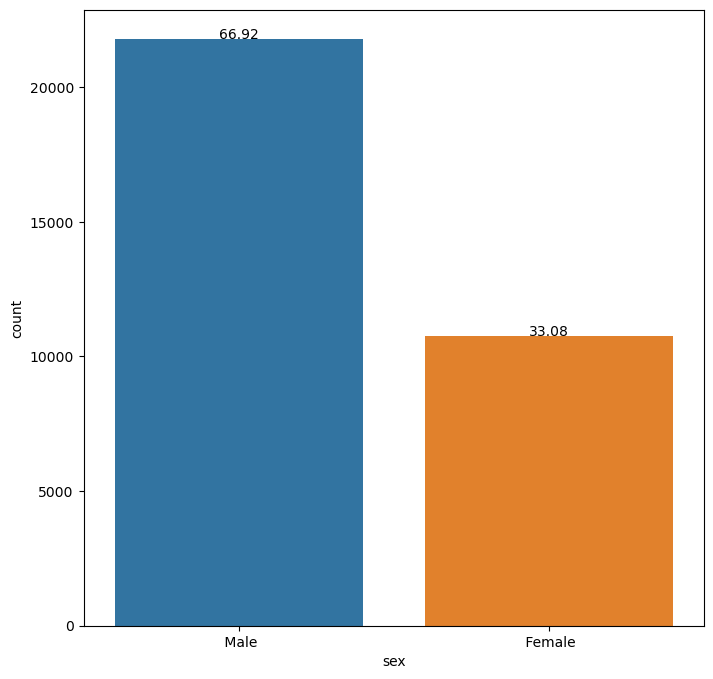

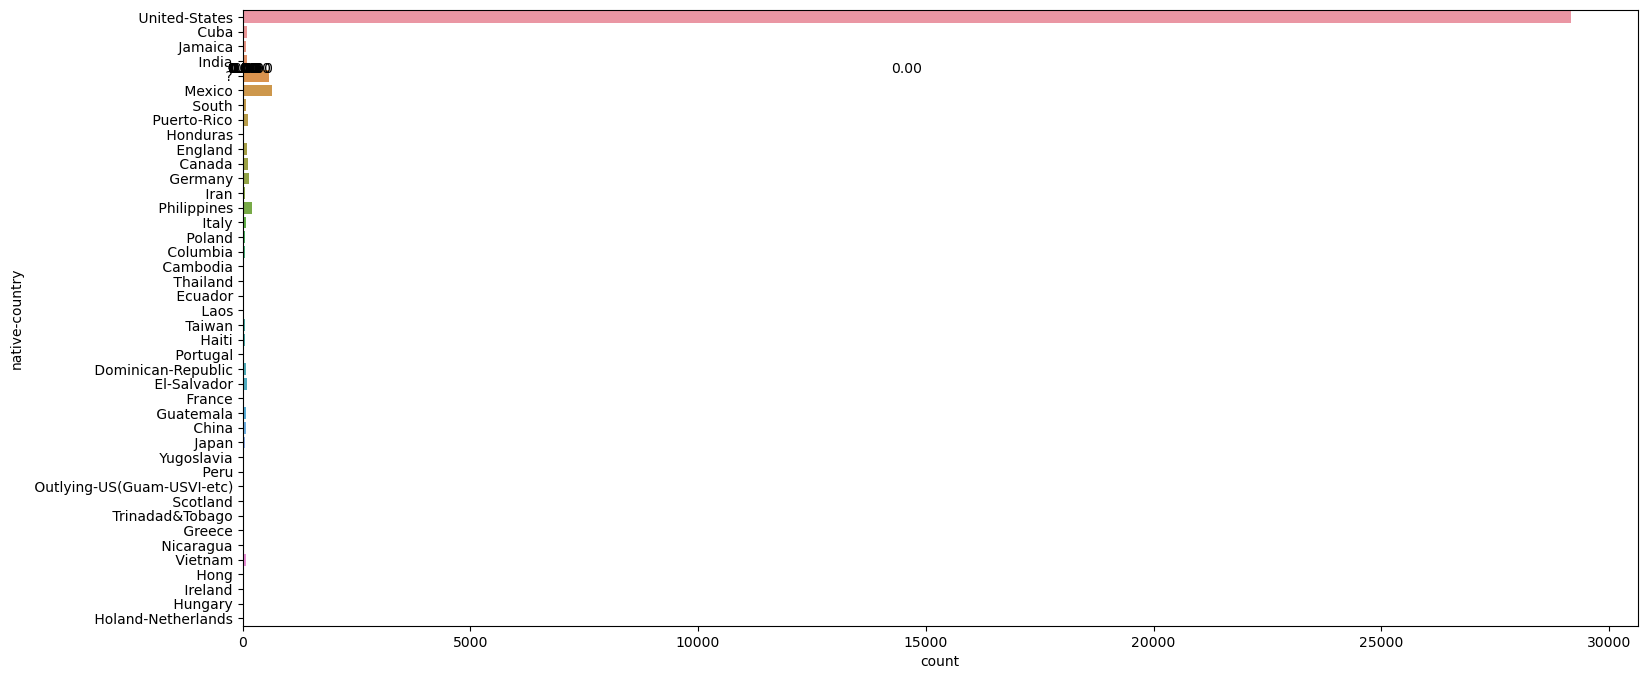

In [22]:
#workclass
plt.figure(figsize=(12,8))

total = float(len(data["target"]) )

ax = sns.countplot(x="workclass", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


#education
plt.figure(figsize=(20,8))
total = float(len(data["target"]) )

ax = sns.countplot(x="education", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

#marital-status
plt.figure(figsize=(20,8))
total = float(len(data["target"]) )

ax = sns.countplot(x="education", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


#occupation
plt.figure(figsize=(25,8))
total = float(len(data) )

ax = sns.countplot(x="occupation", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


#relationship
plt.figure(figsize=(25,8))
total = float(len(data) )

ax = sns.countplot(x="occupation", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


#race
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="race", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


#gender
plt.figure(figsize=(8,8))
total = float(len(data) )

ax = sns.countplot(x="sex", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


#native-country
plt.figure(figsize=(18,8))
total = float(len(data) )

ax = sns.countplot(y="native-country", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


### 5.4 Distribution of Target (Income >50k and <=50k)


In [45]:
#describing the target income
dfy.describe()

,target
count,32561
unique,2
top,<=50K
freq,24720


In [47]:
dfy.value_counts("target")

target
 <=50K    24720
 >50K      7841
dtype: int64

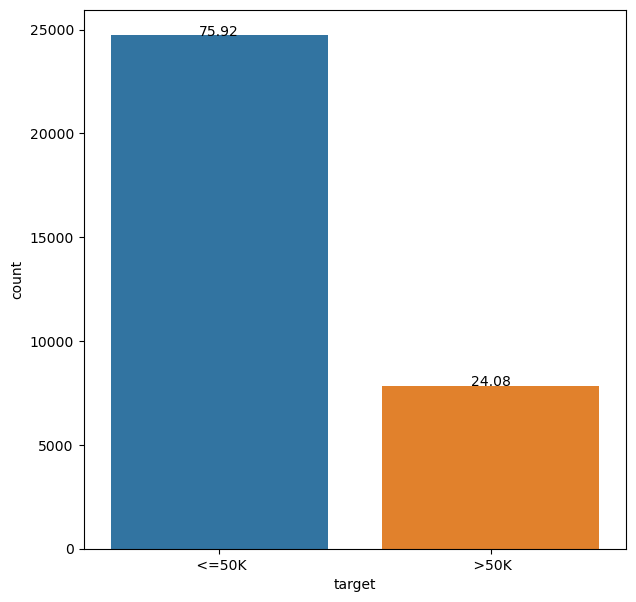

In [48]:

#plotting the histogram
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="target", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### 5.5 Correlation betweeen the Attributes

In [51]:
data.corr(method='pearson')

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


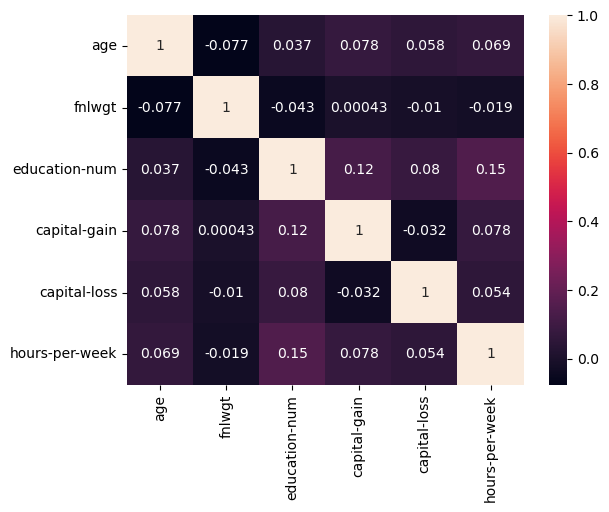

In [52]:
sns.heatmap(data.corr(method='pearson'),annot=True);
plt.show()